# Analysis

M2 Macbook Air (2023)
Memory: 24GB
Disk: 512GB

Vectors: 1M x 768D  (randomly generated)

Write parameters:
- `max_rows_per_group`: 8192
- `max_rows_per_file`: 1024 * 1024 (default)

Test configurations:
- `IVF`: [32, 64, 256, 1024]
- `PQ`: [16,32,64,96]
- `nprobes`: [1,10,25,50]
- `refine_factor`: [None, 1, 5, 10]

Code:
Call `run_tests` in [perf.py](perf.py)

In [1]:
import pandas as pd
df = pd.read_csv("query.csv")

In [5]:
import seaborn as sns
sns.set_style("darkgrid")

# Histogram of median query latency

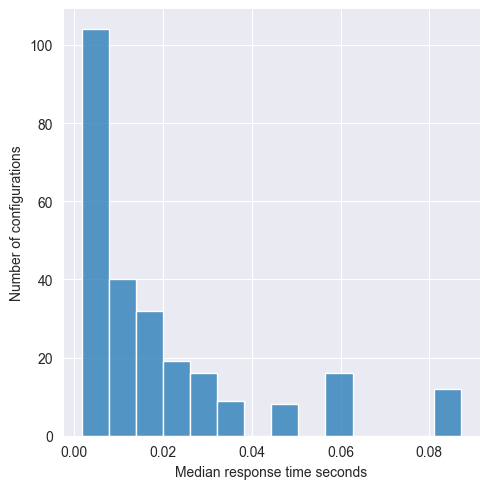

In [8]:
ax = sns.displot(df, x="50%")
ax.set(xlabel="Median response time seconds", ylabel="Number of configurations")

In [13]:
df.groupby("ivf")["50%"].describe()

,count,mean,std,min,25%,50%,75%,max
ivf,,,,,,,,
32.0,64.0,0.032082,0.026801,0.001920,0.010757,0.024426,0.051816,0.085572
64.0,64.0,0.026413,0.024246,0.001613,0.005936,0.021828,0.036099,0.087138
256.0,64.0,0.010854,0.009261,0.001675,0.003519,0.008136,0.014876,0.035234
1024.0,64.0,0.007695,0.003927,0.003198,0.004661,0.006239,0.009814,0.018332


In [15]:
df.groupby("pq")["50%"].describe()

,count,mean,std,min,25%,50%,75%,max
pq,,,,,,,,
16.0,64.0,0.009402,0.006587,0.001613,0.003900,0.007260,0.014019,0.022231
32.0,64.0,0.013085,0.010227,0.001682,0.004509,0.009857,0.019022,0.032448
64.0,64.0,0.023195,0.021240,0.001956,0.005341,0.014339,0.036617,0.060211
96.0,64.0,0.031362,0.030544,0.002154,0.006557,0.018382,0.051712,0.087138


In [16]:
df.groupby("nprobes")["50%"].describe()

,count,mean,std,min,25%,50%,75%,max
nprobes,,,,,,,,
1.0,64.0,0.003308,0.001312,0.001613,0.002258,0.003223,0.003966,0.007116
10.0,64.0,0.013890,0.012305,0.003736,0.005845,0.007927,0.017415,0.049728
25.0,64.0,0.026239,0.022855,0.006177,0.008876,0.016646,0.034535,0.084565
50.0,64.0,0.033607,0.024742,0.008927,0.014828,0.024181,0.041161,0.087138


In [17]:
df.groupby("refine_factor")["50%"].describe()

,count,mean,std,min,25%,50%,75%,max
refine_factor,,,,,,,,
1.0,64.0,0.019046,0.021429,0.001613,0.004616,0.010292,0.024471,0.085852
5.0,64.0,0.019357,0.021453,0.001978,0.004939,0.010700,0.024362,0.086231
10.0,64.0,0.019685,0.021409,0.002313,0.005290,0.011049,0.025032,0.087138


<Axes: xlabel='nprobes', ylabel='50%'>

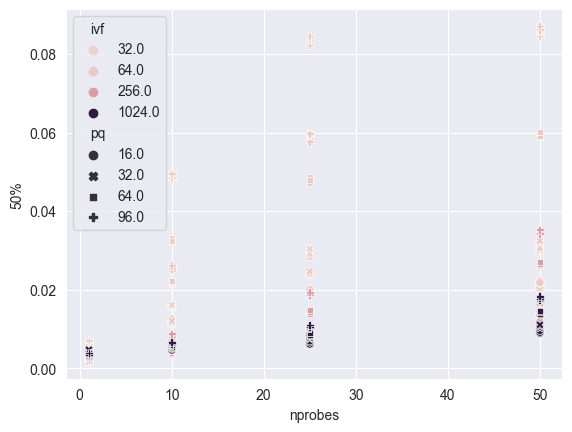

In [18]:
sns.scatterplot(data=df, x="nprobes", y="50%", hue="ivf", style="pq")